In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

import numpy as np
import matplotlib.pyplot as plt

from ylearn.estimator_model.causal_tree import CausalTree, CTCausalForest
from ylearn.exp_dataset.exp_data import sq_data
from ylearn.utils._common import to_df

In [2]:
n = 2000
d = 10     
n_x = 1
y, x, v = sq_data(n, d, n_x)

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])

v_test = v[:min(100, n)].copy()
v_test[:, 0] = np.linspace(np.percentile(v[:, 0], 1), np.percentile(v[:, 0], 99), min(100, n))

data = to_df(treatment=x, outcome=y, v=v)
test_data = to_df(v=v_test)

outcome = 'outcome'
treatment = 'treatment'
adjustment = data.columns[2:]

10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 917 - Building the causal tree with splitter BestSplitter
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
10-28 12:12:20 I ylearn.e.causal_tree.py 901 - Start building the cau

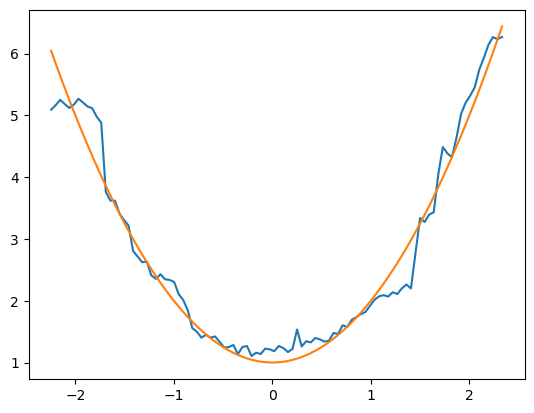

In [8]:
ctcf = CTCausalForest(
    n_jobs=-1, 
    honest_subsample_num=0.5,
    min_samples_split=2,
    min_samples_leaf=10, 
    sub_sample_num=0.8, 
    n_estimators=500, 
    random_state=2022, 
    min_impurity_decrease=1e-10, 
    max_depth=100, 
    max_features=0.8,
    verbose=0,
)
ctcf.fit(data=data, outcome=outcome, treatment=treatment, adjustment=adjustment)
ctcf_pred = ctcf.estimate(data=test_data)
for t in range(n_x):
    plt.plot(v_test[:, 0], ctcf_pred[:, t])
    plt.plot(v_test[:, 0], true_te(v_test)[:, t])
plt.show()